In [1]:
import pandas as pd

In [3]:
chipo = pd.read_csv('../csv/num_1/chipotle.tsv', sep='\t')

In [4]:
chipo.head(3)

order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   
1         1         1                          Izze       [Clementine]   
2         1         1              Nantucket Nectar            [Apple]   

  item_price  
0     $2.39   
1     $3.39   
2     $3.39

### 문제
1. 가장 많이 주문한 item_name과 그 수량을 출력
2. item당 주문 총량을 구하고 바형 그래프 표시 
3. item_price 컬럼의 데이터에서 '$'표시를 제거하고 float의 형태로 데이터 변환
4. order_id의 데이터 타입을 str으로 변경
5. 주문당 평균 계산 금액 출력

In [18]:
## 1. 가장 많이 주문한 item_name과 그 수량을 출력
group_data = chipo.groupby('item_name').sum()[['quantity']]\
.sort_values('quantity', ascending=False)

C:\Users\ezen\AppData\Local\Temp\ipykernel_4092\2452280019.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = chipo.groupby('item_name').sum()[['quantity']]\


In [10]:
## 주문 총량의 바형 그래프 시각화
import matplotlib.pyplot as plt

In [27]:
group_data['quantity']

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


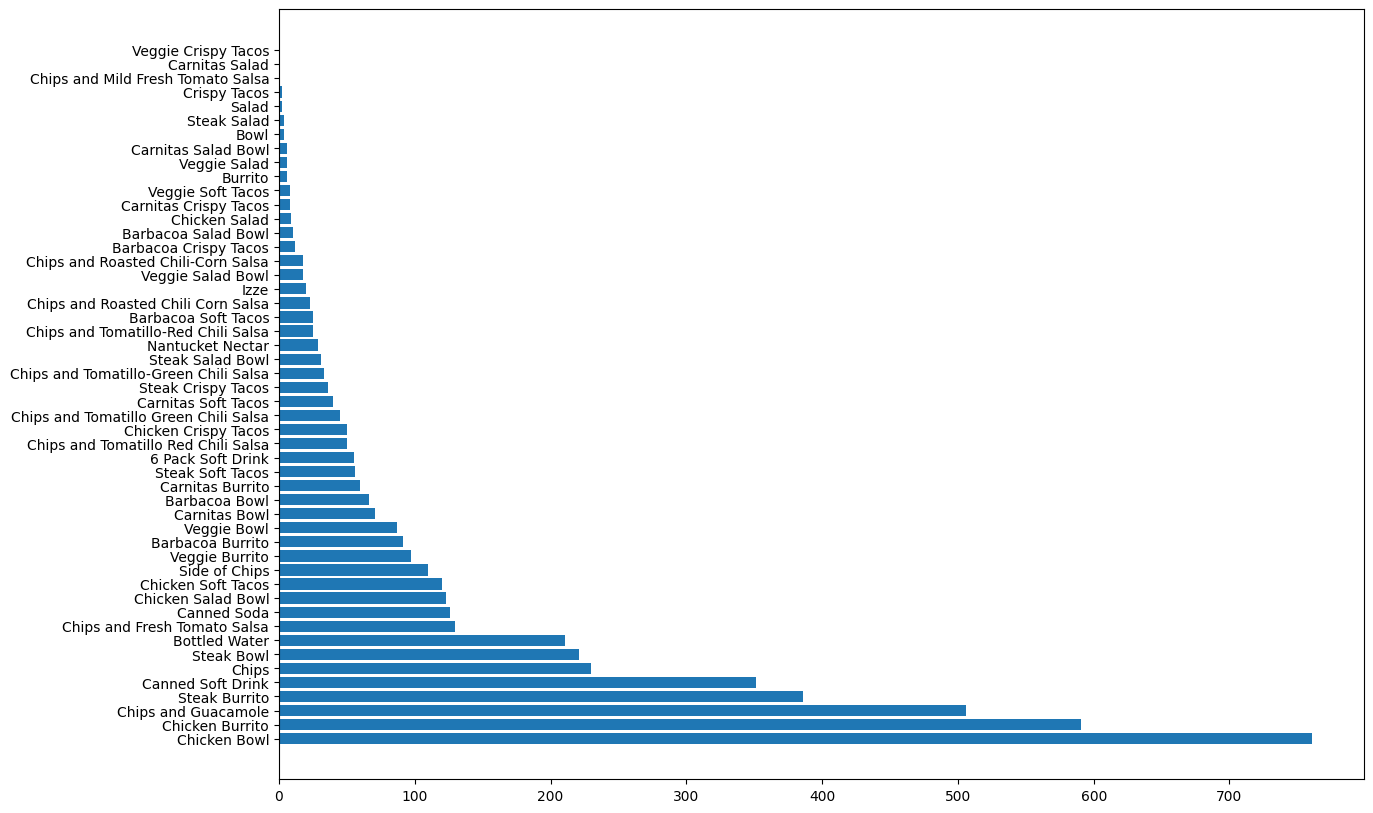

In [28]:
## bar 그래프는 x, y 값이 필요

x = group_data.index
y = group_data['quantity']

# 그래프 사이즈 변경
plt.figure(figsize=(14, 10))
plt.barh(x, y)
plt.show()

In [35]:
## item_price의 '$'를 삭제

# case1
chipo['item_price'].str.replace("$", "")

# case2(apply + lambda)
chipo['item_price'].apply(lambda x : x.replace('$', ''))

# case3(apply + 일반함수)
def change(x):
    result = x.replace('$', '')
    return float(result)
chipo['item_price'].apply(change)

# case4
chipo['item_price'] = chipo['item_price'].str.lstrip('$').astype('float')

C:\Users\ezen\AppData\Local\Temp\ipykernel_4092\2865606898.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'].str.replace("$", "")


In [37]:
## order_id의 데이터의 형태를 str 변경
chipo['order_id'] = chipo['order_id'].astype('str')

In [40]:
chipo.groupby('order_id').sum()['item_price'].mean()

C:\Users\ezen\AppData\Local\Temp\ipykernel_4092\518303108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('order_id').sum()['item_price'].mean()


18.811428571428568